###  5.1 합성곱 신경망(convolutional neural network) (컨브넷convnet) 소개

컴퓨터 비전 애플리케이션에 사용되는 딥러닝 모델

2장에서의 densely connected network에서 사용한 MNIST 숫자 이미지 분류를 컨브넷에 적용하는 예제

In [1]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


컨브넷은 (image_height, image_width, image_channels)크기의 입력텐서 사용

MNIST이미지 포맷 (28,28,1)크기의 입력 처리 하기위해 첫번째 층의 매개변수로 

input_shape = (28,28,1) 전달

지금까지의 convnet의 구조

In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


conv2d와 maxpooling2d층의 출력은 (height, width, channels) 크기의 3D 텐서이고. 높이와 넓이 차원은 네트워크가 깊어질수록 작아지는 경향이 있음.

다음 단계에서 마지막 층의 ((3, 3, 64) 크기인) 출력 텐서를 완전 연결 네트워크에 주입

이 분류기는 1D벡터 처리지만 전층 벡터는 3D 텐서 3D -> 1D 로 펼쳐야함

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

5번째 output shape가 (3,3,64) 에서 (576)으로 바뀐것을 볼수있음

MNIST 이미지를 이용해 convnet 훈련

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5,batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5


In [ ]:
test_loss, test_acc = model.evaluate(test_image, test_labels)
test_acc

실행 시킬경우 0.987의 정확도가 나옴

## 5.1.1 합성곱연산

---

완전연결층(densely connected network)와 합성곱(convolutional neural network)의 차이 : 

Dense 층 : 입력 특성 공간에 있는 전역 패턴을 학습

합성곱 층: 지역 패턴을 학습

convnet의 두가지 성질

1. 학습된 패턴은 평행 이동 불변성(translation invariant)을 가짐
   컨브넷이 이미지의 오른쪽 아래에서 어떤 패턴을 학습할경우 다른곳 에서도 패턴 인식가능
   완전연결층은 새롭게 학습해야함
   이미지를 효율적으로 처리하게 만들어줌
   적은 수의 훈련 샘플 사용 일반화 능력을 가진 표현을 학습할수 있음.
2. 패턴의 공간적 계층 구조를 학습 할 수 있음.
   첫번째 CNN층은 작은 지역의 패턴을 학습
   두번째 CNN층은 첫번째 층의 특성으로 구성된 큰 패턴 학습
   이런 방식으로 복잡하고 추상적인 시각적 개념을 학습 가능
   


CNN은 특성맵(feature map)이라 부르는 텐서에 적용

이텐서는 2개의 공간(높이, 넓이)축 과 깊이(채널) 축으로 구성

RGB = 3컬러채널

그레이스케일 = 1채널

CNN은 입력 특성 맵(input feature map)에서 작은 패치(patch)들 추출 모든 패치에 같은 변환을 적용 출력 특성 맵(output feature map) 생성

output feature map 도 높이 넓이 그리고 필터로 구성된 3D 텐서

필터는 입력 데이터의 어떤 특성을 인코딩
예) 하나의 필터가 입력에 얼굴이 있는지를 인코딩

예제 첫번째 layer 

model.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (28,28,1)))

(28,28,1) 크기의 입력 (26,26,32) 크기의 출력

즉 32개의 필터를 적용 각각은 26 * 26 크기의 배열 값을 가짐

합성곱의 2가지 파라미터
1. 입력으로 부터 뽑아낼 패치의 크기 3 * 3 or 5 * 5
2. 특성 맵의 출력 깊이 필터의 수

model.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (28,28,1)))

패치
3 * 3 크기의 윈도우가 슬라이딩 하면서 3d 특성을 추출하는 방식으로 작동

이런 3d 패치는 합성곱커널(convolution kernel)와의 곱을 통하여 1d 벡터로 변환

출력 특성 맵의 공간상 위치는 입력 특성 맵의 같은 위치에 대응

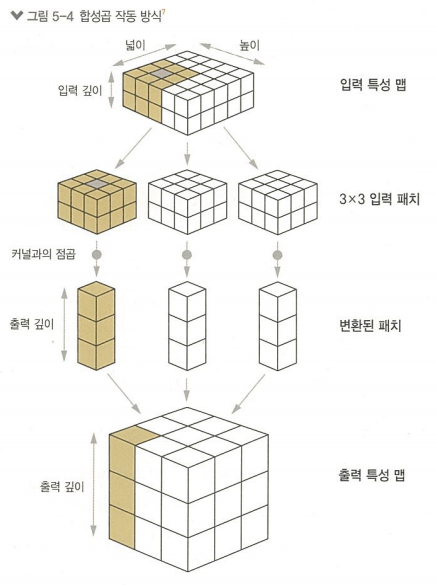

출력의 높이, 넓이는 입력의 높이, 넓이와 다를수 있음

이유

1. 경계문제 패딩(padding)을 추가하여 대응 가능
2. 스트라이드의 사용여부

패딩

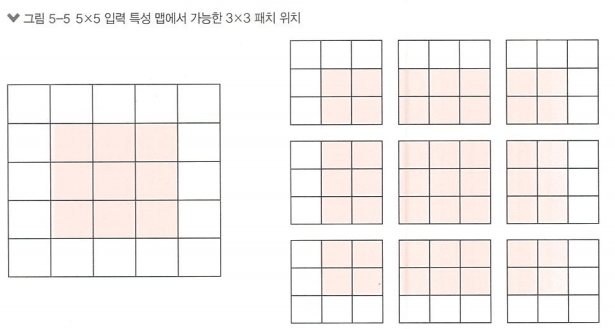

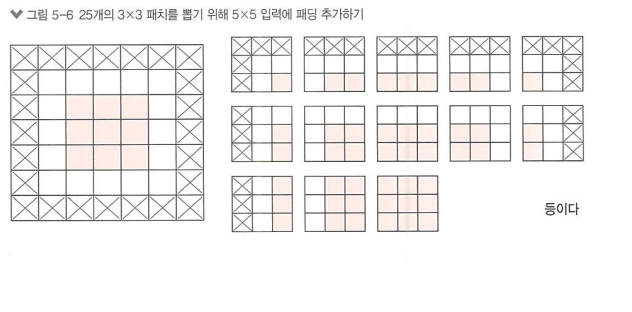

Conv2D 층에서 padding 매개변수로 설정 가능

valid : 패딩 사용 안함

same : 패딩 사용

스트라이드

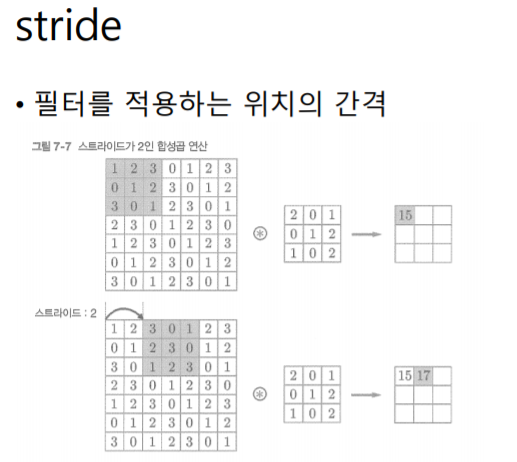
http://ling.snu.ac.kr/class/cl_under1801/DL07-Convolutional%20Neural%20Network.pdf

패딩을 키우면 출력크기가 커지고
스트라이드를 키우면 출력크기가 작아짐

## 5.1.2 maxpooling

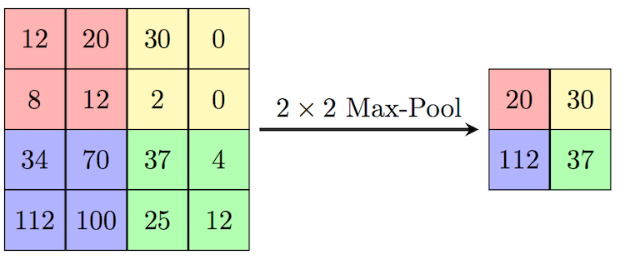
https://computersciencewiki.org/index.php/Max-pooling_/_Pooling

합성곱 : 전형적으로 3x3 윈도우와 스트라이드 1를 사용하여 다운샘플링

maxpooling : 2x2 윈도우 스트라이드 2를 사용하여 다운샘플링

다운 샘플링을 하지 않았을때의 문제점

1. 마지막 합성곱 층의 특성이 전체 입력에 대한 정보를 가지고 있어야하는데 전체 입력의 일부분에 대한 정보만 가짐
2. 최종 특성맵은 22x22x64 = 30976개의 가중치를 가짐 너무 많음

## 5.2 소규모 데이터셋이세 밑바닥부터 컨브넷 훈련하기

4000개의 고양이와 강이지 이미지 분류(2000고양이, 2000강아지)
2000개 훈련, 1000개 검증, 1000개 테스트

모델 훈련 순서 
1. 2000개의 훈련 샘플에서 기준이되는 기본성능을 만들기(약 71% 정확도)
2. 과대적합을 줄이기 위한 데이터증식(data augmentation) (약 82% 정확도)
3. 사전 훈련된 네트워크로 특성을 추출, 사전 훈련된 네트워크를 세밀하게 튜닝(약 92% 정확도)

### 5.2.2 데이터 내려받기

---

Dogs vs Cats

https://www.kaggle.com/c/dogs-vs-cats/data 에서 다운로드 가능

1000개의 훈련세트 500개의 검증세트 500개의 테스트 세트를 만드는 코드

In [30]:
import os, shutil

## 원본 데이터셋 압축해제한 디렉터리
original_dataset_dir = 'D:\\datasets\\cats_and_dogs\\train\\train'

## 소규모 데이터셋을 저장한 디렉터리
base_dir = 'D:\\datasets\\cats_and_dogs_small'
#os.mkdir(base_dir)

## 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir,'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')
#os.mkdir(test_dir)

## 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir,'cats')
#os.mkdir(train_cats_dir)

## 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

## 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

## 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

## 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

## 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)
'''
## 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

## 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
## 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
## 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
## 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
## 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
'''

"\n## 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다\nfnames = ['cat.{}.jpg'.format(i) for i in range(1000)]\nfor fname in fnames:\n    src = os.path.join(original_dataset_dir, fname)\n    dst = os.path.join(train_cats_dir, fname)\n    shutil.copyfile(src, dst)\n\n## 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다\nfnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]\nfor fname in fnames:\n    src = os.path.join(original_dataset_dir, fname)\n    dst = os.path.join(validation_cats_dir, fname)\n    shutil.copyfile(src, dst)\n    \n## 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다\nfnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]\nfor fname in fnames:\n    src = os.path.join(original_dataset_dir, fname)\n    dst = os.path.join(test_cats_dir, fname)\n    shutil.copyfile(src, dst)\n    \n## 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다\nfnames = ['dog.{}.jpg'.format(i) for i in range(1000)]\nfor fname in fnames:\n    src = os.path.join(original_dataset_dir, fname)\n    dst = os.path.join(trai

이후에 사진의 개수를 카운트 할경우

훈련용 고양이 이미지 전체개수 : 1000<br>
훈련용 강아지 이미지 전체개수 : 1000

검증용 고양이, 강아지 이미지 전체개수: 각 500개<br>
테스트용 고양이, 강아지 이미지 전체개수 : 각 500개

### 5.2.3 네트워크 구성

4개의 Conv3D 와 3개의 Maxpooling2D 층을 번갈아 쌓은 컨브넷 구성

150x150 크기의 입력에서 flatten층 이전에 7x7 크기의 특성 맵으로 줄어듬

* 특성맵의 깊이는 네트워크에서 점진적으로 증가 특성맵의 크기는 감소

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation= 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [5]:
from keras import layers
from keras import models


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### 5.2.4 데이터 전처리

---

다운로드 받은 사진은 JPEG파일 이므로 네트워크에 주입되기전에 전처리를 해야함

1. 사진파일을 읽음
2. JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩
3. float의 텐서로 변환
4. 픽셀값(0~255) 의 스케일을 (0~1) 사이로 조정 (신경망은 작은 입력값 선호)

케라스의 keras.preprocessing.image 에 ImageDataGenerator 클래스에서 이미지 파일을 전처리된 텐서로 바꾸어주는 파이썬 제너레이터 생성

파이썬 제너레이터는 반복자 처럼 작동하는 객체 for in 연산자에 사용가능 <br>
yield연산자 사용

In [31]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


제너레이터의 출력은 150x150 RGB 이미지의 배치 (20,150,150,3), 이진 레이블배치(20,)크기로 이뤄짐 각 배치에 20개의 샘플이 존재 제너레이터는 break를 사용하지 않으면 끝없이 반복하여 break 문 사용 필요

fit_generator 메서드를 사용할경우 제너레이터를 사용할 수 있음
하나의 에포크를 정의하기 위해 제너레이터로부터 얼마나 많은 샘플을 뽑을것인지 지정해야함<br>
steps_per_epoch 에서 설정가능<br>
위에서 batch_size 가 20이므로 2000개의 샘플을 처리하기 위해선 100개의 steps_per_epoch 가 필요함<br>

validation의 경우 1000개의 데이터를 사용하기위해 50개의 step가 필요
(20 * 50)

* 모델 훈련하기 

In [32]:
from keras import optimizers

model.compile(loss ='binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics=['acc'])

In [14]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs = 30,
      validation_data = validation_generator,
      validation_steps = 50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 247s 2s/step - loss: 0.6973 - acc: 0.5200 - val_loss: 0.6822 - val_acc: 0.5800
Epoch 2/30
100/100 [==============================] - 25s 250ms/step - loss: 0.6674 - acc: 0.6075 - val_loss: 0.6554 - val_acc: 0.6310
Epoch 3/30
100/100 [==============================] - 24s 239ms/step - loss: 0.6309 - acc: 0.6490 - val_loss: 0.6323 - val_acc: 0.6500
Epoch 4/30
100/100 [==============================] - 24s 245ms/step - loss: 0.5964 - acc: 0.6905 - val_loss: 0.6139 - val_acc: 0.6720
Epoch 5/30
100/100 [==============================] - 24s 239ms/step - loss: 0.5588 - acc: 0.7185 - val_loss: 0.6014 - val_acc: 0.6610
Epoch 6/30
100/100 [==============================] - 25s 252ms/step - loss: 0.5235 - acc: 0.7440 - val_loss: 0.7077 - val_acc: 0.6110
Epoch 7/30
100/100 [==============================] - 27s 265ms/step - loss: 0.4856 - acc: 0.7650 - val_loss: 0.5893 - val_acc: 0.6740
Epoch 8/3

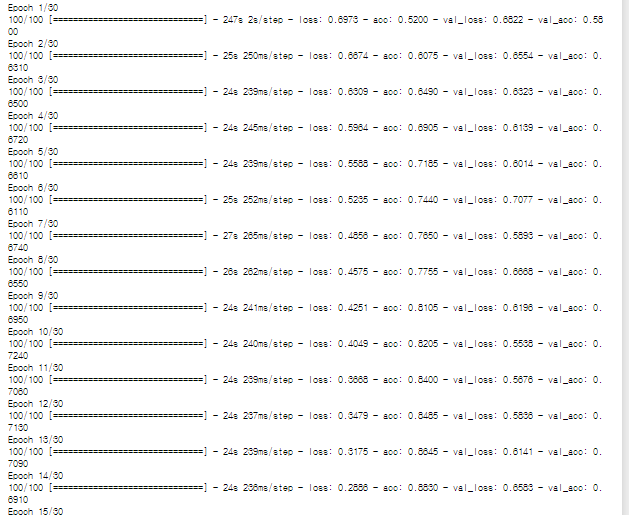

In [15]:
model.save('cats_and_dogs_samll_1.h5')

훈련데이터와 검증 데이터에 대한 모델의 손실, 정확도

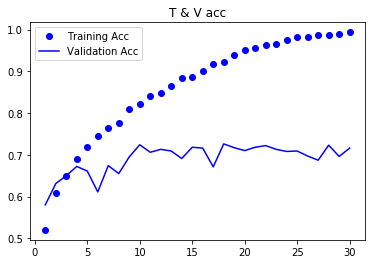

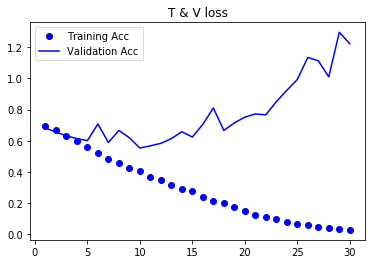

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label= 'Validation Acc')
plt.title('T & V acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Acc')
plt.plot(epochs, val_loss, 'b', label= 'Validation Acc')
plt.title('T & V l')
plt.legend()

plt.show()


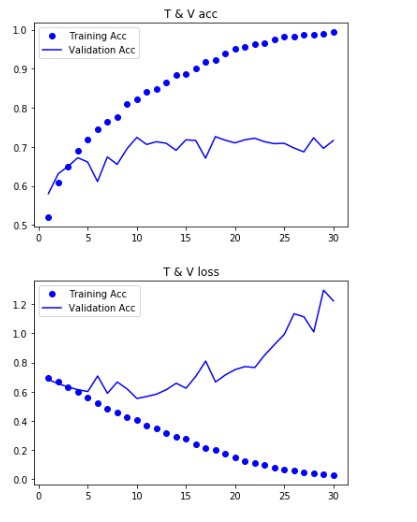

검증 정확도가 70~72%에서 멈춤
과대적합을 감소시키기 위해 데이터 증식을 사용할수있음

### 5.2.5 데이터 증식 사용하기

과대 적합은 학습할 샘플이 너무 적어 일반화 할 수 있는 모델을 훈련 시킬 수 없기 때문에 발생

데이터 증식은 기존 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법

ImageDataGenerator 가 여러 종류의 랜덤 변환을 적용하도록 설정 가능

In [33]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest')

2. rotation -> 회전<br>
3,4. 수평, 수직 이동범위
5.랜덤하게 왜곡시킬 각도 범위
6. 랜덤하게 사진 확대
7. 수평으로 화면을 뒤집음
8. 회전이나 가로 세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채우는 법

증식된 이미지 보기

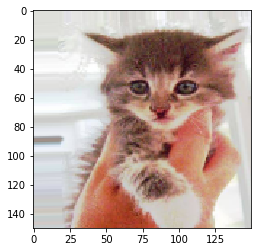

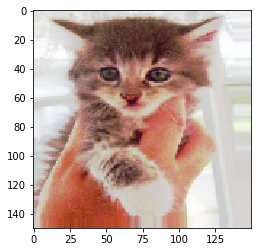

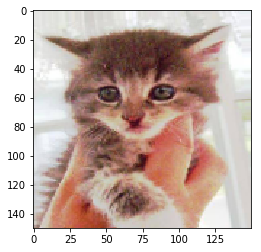

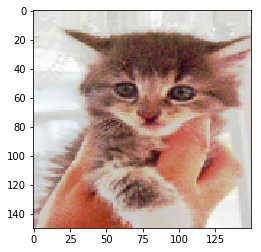

In [34]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)])

#증식할 이미지 선택
img_path = fnames[3]

#이미지를 읽고 크기를 변경
img = image.load_img(img_path, target_size = (150,150))

#(150,150,3) 크기의 넘파이배열로 변환
x= image.img_to_array(img)
#(1,150,150,3) 크기로 변환
x = x.reshape((1,) + x.shape)

#랜덤 이미지를 무한대로 뽑아내기위해 조건문을 사용하여 break 함
i = 0
for batch in datagen.flow(x,batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 ==0:
        break
plt.show()


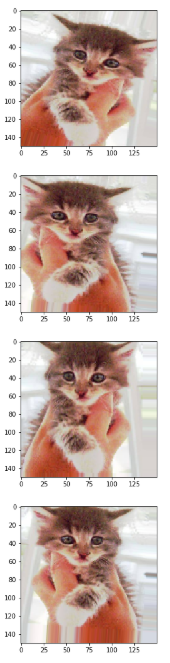

이미지 증식을 할경우 샘플은 늘어나지만 샘플간의 상호 연관성이 커서 모자란 샘플을 채워주기에 부족할수 있음 

완전 연결 분류기 직전에 Dropout 층 추가 가능

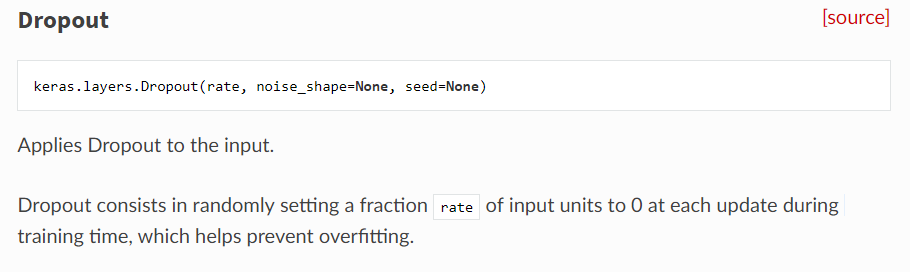

In [35]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss ='binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics=['acc'])

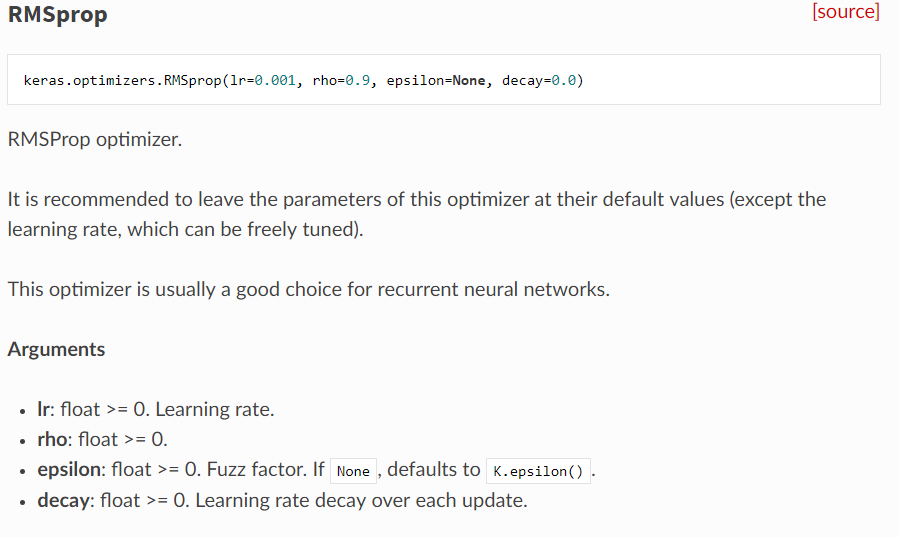

In [38]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

#검증 데이터는 증식 되면 안됨
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode = 'binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 48s 481ms/step - loss: 0.5743 - acc: 0.6975 - val_loss: 0.5672 - val_acc: 0.6948
Epoch 2/30
100/100 [==============================] - 42s 423ms/step - loss: 0.5658 - acc: 0.7012 - val_loss: 0.5953 - val_acc: 0.6733
Epoch 3/30
100/100 [==============================] - 42s 424ms/step - loss: 0.5501 - acc: 0.7178 - val_loss: 0.5751 - val_acc: 0.6961
Epoch 4/30
100/100 [==============================] - 43s 430ms/step - loss: 0.5492 - acc: 0.7147 - val_loss: 0.7213 - val_acc: 0.6476
Epoch 5/30
100/100 [==============================] - 49s 493ms/step - loss: 0.5531 - acc: 0.7187 - val_loss: 0.5418 - val_acc: 0.7113
Epoch 6/30
100/100 [==============================] - 50s 499ms/step - loss: 0.5425 - acc: 0.7150 - val_loss: 0.5337 - val_acc: 0.7352
Epoch 7/30
100/100 [==============================] - 47s 471ms/step - loss: 0.5359 - acc: 0.7334 - val_lo

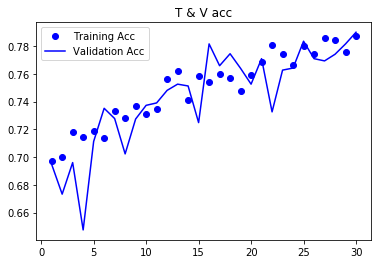

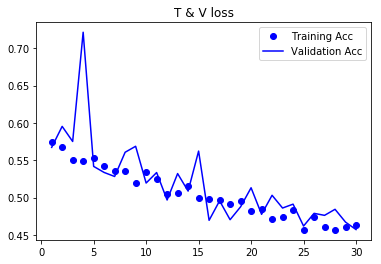

In [39]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label= 'Validation Acc')
plt.title('T & V acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Acc')
plt.plot(epochs, val_loss, 'b', label= 'Validation Acc')
plt.title('T & V loss')
plt.legend()

plt.show()


In [ ]:
# 모델 저장
model.save(cats_and_dogs_small_2.h5)